In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [ ]:
temp = pd.read_csv("/content/temperatures.csv")
temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
#Data Preprocessing
#Removing Duplicates
temp = temp.drop_duplicates()
print(temp)

     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    29.97  27.3

In [ ]:
temp.isnull()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
temp.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
temp.dropna(how = 'any', inplace = True)

In [ ]:
#Splitting
x = temp[["YEAR","OCT", "NOV" , "DEC"]].values
y = temp["OCT-DEC"].values
print(x)

[[1901.     29.97   27.31   24.49]
 [1902.     29.12   26.31   24.04]
 [1903.     29.04   26.08   23.65]
 [1904.     29.2    26.36   23.63]
 [1905.     30.67   27.52   23.82]
 [1906.     29.55   27.6    24.72]
 [1907.     29.87   27.78   24.44]
 [1908.     29.35   26.88   23.73]
 [1909.     29.25   27.69   23.69]
 [1910.     28.91   26.32   23.37]
 [1911.     29.43   25.7    23.71]
 [1912.     29.64   26.37   23.7 ]
 [1913.     29.42   26.28   23.56]
 [1914.     28.63   26.75   23.82]
 [1915.     30.08   27.62   23.78]
 [1916.     28.98   26.14   23.82]
 [1917.     27.9    25.94   23.43]
 [1918.     30.06   26.95   23.32]
 [1919.     29.44   26.85   23.5 ]
 [1920.     30.03   27.46   24.82]
 [1921.     28.51   26.61   24.17]
 [1922.     28.81   26.71   23.62]
 [1923.     28.57   26.68   24.05]
 [1924.     29.43   26.17   23.81]
 [1925.     29.43   26.2    24.15]
 [1926.     29.38   26.29   24.13]
 [1927.     29.55   26.3    24.33]
 [1928.     29.8    26.9    23.5 ]
 [1929.     28.61   

In [ ]:
print(y)

[27.25 26.49 26.26 26.4  26.57 27.29 27.36 26.64 26.88 26.2  26.31 26.57
 26.42 26.4  27.19 26.31 25.74 26.78 26.6  27.45 26.43 26.38 26.43 26.49
 26.59 26.61 26.73 26.74 26.28 26.9  26.97 27.18 26.92 26.94 26.88 26.69
 26.26 26.71 27.05 27.24 27.62 27.23 27.33 27.16 26.82 27.3  26.7  26.77
 26.79 26.58 27.77 27.26 27.56 26.46 26.59 26.37 26.82 27.01 27.03 27.36
 26.3  26.65 27.   27.2  27.61 27.26 26.9  27.19 27.71 27.5  27.17 27.21
 26.97 27.03 26.99 27.76 27.59 27.64 27.67 27.51 27.24 27.26 27.23 27.46
 27.35 27.4  27.82 27.76 27.57 27.5  27.4  27.49 27.74 27.52 28.52 27.29
 26.65 27.83 27.95 28.53 28.13 28.36 27.7  27.65 27.5  27.78 28.03 28.29
 27.96 27.78 28.23 27.88 27.83 27.81 28.27 30.03 29.69]


In [ ]:
print(x[:,1:3])

[[29.97 27.31]
 [29.12 26.31]
 [29.04 26.08]
 [29.2  26.36]
 [30.67 27.52]
 [29.55 27.6 ]
 [29.87 27.78]
 [29.35 26.88]
 [29.25 27.69]
 [28.91 26.32]
 [29.43 25.7 ]
 [29.64 26.37]
 [29.42 26.28]
 [28.63 26.75]
 [30.08 27.62]
 [28.98 26.14]
 [27.9  25.94]
 [30.06 26.95]
 [29.44 26.85]
 [30.03 27.46]
 [28.51 26.61]
 [28.81 26.71]
 [28.57 26.68]
 [29.43 26.17]
 [29.43 26.2 ]
 [29.38 26.29]
 [29.55 26.3 ]
 [29.8  26.9 ]
 [28.61 27.19]
 [29.22 26.73]
 [29.39 26.94]
 [29.68 27.35]
 [28.98 27.05]
 [29.75 26.77]
 [29.56 26.88]
 [29.86 26.47]
 [28.83 26.69]
 [29.35 26.45]
 [29.36 26.94]
 [29.97 27.47]
 [30.52 27.35]
 [30.03 27.78]
 [29.43 27.69]
 [29.82 27.  ]
 [29.42 27.08]
 [29.98 26.85]
 [29.23 27.71]
 [29.58 26.79]
 [29.5  26.67]
 [28.96 26.79]
 [30.53 27.66]
 [29.78 27.36]
 [29.79 27.19]
 [28.24 26.74]
 [28.6  26.88]
 [28.26 26.55]
 [29.12 26.82]
 [29.23 27.14]
 [29.45 26.65]
 [29.9  26.92]
 [29.08 26.23]
 [29.14 26.9 ]
 [29.85 26.83]
 [30.07 27.13]
 [30.32 27.84]
 [29.68 27.41]
 [29.48 27

In [ ]:
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
print(x[:,1:3])

[[29.97 27.31]
 [29.12 26.31]
 [29.04 26.08]
 [29.2  26.36]
 [30.67 27.52]
 [29.55 27.6 ]
 [29.87 27.78]
 [29.35 26.88]
 [29.25 27.69]
 [28.91 26.32]
 [29.43 25.7 ]
 [29.64 26.37]
 [29.42 26.28]
 [28.63 26.75]
 [30.08 27.62]
 [28.98 26.14]
 [27.9  25.94]
 [30.06 26.95]
 [29.44 26.85]
 [30.03 27.46]
 [28.51 26.61]
 [28.81 26.71]
 [28.57 26.68]
 [29.43 26.17]
 [29.43 26.2 ]
 [29.38 26.29]
 [29.55 26.3 ]
 [29.8  26.9 ]
 [28.61 27.19]
 [29.22 26.73]
 [29.39 26.94]
 [29.68 27.35]
 [28.98 27.05]
 [29.75 26.77]
 [29.56 26.88]
 [29.86 26.47]
 [28.83 26.69]
 [29.35 26.45]
 [29.36 26.94]
 [29.97 27.47]
 [30.52 27.35]
 [30.03 27.78]
 [29.43 27.69]
 [29.82 27.  ]
 [29.42 27.08]
 [29.98 26.85]
 [29.23 27.71]
 [29.58 26.79]
 [29.5  26.67]
 [28.96 26.79]
 [30.53 27.66]
 [29.78 27.36]
 [29.79 27.19]
 [28.24 26.74]
 [28.6  26.88]
 [28.26 26.55]
 [29.12 26.82]
 [29.23 27.14]
 [29.45 26.65]
 [29.9  26.92]
 [29.08 26.23]
 [29.14 26.9 ]
 [29.85 26.83]
 [30.07 27.13]
 [30.32 27.84]
 [29.68 27.41]
 [29.48 27

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder' ,OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

  (0, 0)	1.0
  (0, 117)	29.97
  (0, 118)	27.31
  (0, 119)	24.49
  (1, 1)	1.0
  (1, 117)	29.12
  (1, 118)	26.31
  (1, 119)	24.04
  (2, 2)	1.0
  (2, 117)	29.04
  (2, 118)	26.08
  (2, 119)	23.65
  (3, 3)	1.0
  (3, 117)	29.2
  (3, 118)	26.36
  (3, 119)	23.63
  (4, 4)	1.0
  (4, 117)	30.67
  (4, 118)	27.52
  (4, 119)	23.82
  (5, 5)	1.0
  (5, 117)	29.55
  (5, 118)	27.6
  (5, 119)	24.72
  (6, 6)	1.0
  :	:
  (110, 119)	25.6
  (111, 111)	1.0
  (111, 117)	30.2
  (111, 118)	28.11
  (111, 119)	25.34
  (112, 112)	1.0
  (112, 117)	30.27
  (112, 118)	27.83
  (112, 119)	25.37
  (113, 113)	1.0
  (113, 117)	30.29
  (113, 118)	28.05
  (113, 119)	25.08
  (114, 114)	1.0
  (114, 117)	31.04
  (114, 118)	28.1
  (114, 119)	25.67
  (115, 115)	1.0
  (115, 117)	31.98
  (115, 118)	30.11
  (115, 119)	28.01
  (116, 116)	1.0
  (116, 117)	32.29
  (116, 118)	29.6
  (116, 119)	27.18


In [ ]:
print(y)

[27.25 26.49 26.26 26.4  26.57 27.29 27.36 26.64 26.88 26.2  26.31 26.57
 26.42 26.4  27.19 26.31 25.74 26.78 26.6  27.45 26.43 26.38 26.43 26.49
 26.59 26.61 26.73 26.74 26.28 26.9  26.97 27.18 26.92 26.94 26.88 26.69
 26.26 26.71 27.05 27.24 27.62 27.23 27.33 27.16 26.82 27.3  26.7  26.77
 26.79 26.58 27.77 27.26 27.56 26.46 26.59 26.37 26.82 27.01 27.03 27.36
 26.3  26.65 27.   27.2  27.61 27.26 26.9  27.19 27.71 27.5  27.17 27.21
 26.97 27.03 26.99 27.76 27.59 27.64 27.67 27.51 27.24 27.26 27.23 27.46
 27.35 27.4  27.82 27.76 27.57 27.5  27.4  27.49 27.74 27.52 28.52 27.29
 26.65 27.83 27.95 28.53 28.13 28.36 27.7  27.65 27.5  27.78 28.03 28.29
 27.96 27.78 28.23 27.88 27.83 27.81 28.27 30.03 29.69]


In [ ]:
#Encoding target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[47 12  2  8 13 49 53 18 29  1  5 13  9  8 42  5  0 26 16 55 10  7 10 12
 15 17 23 24  3 30 33 41 31 32 29 20  2 22 38 46 65 45 51 39 28 50 21 25
 27 14 73 48 61 11 15  6 28 36 37 53  4 19 35 43 64 48 30 42 70 58 40 44
 33 37 34 72 63 66 68 59 46 48 45 56 52 54 76 72 62 58 54 57 71 60 87 49
 19 77 79 88 82 86 69 67 58 74 81 85 80 74 83 78 77 75 84 90 89]


<Axes: xlabel='YEAR', ylabel='ANNUAL'>

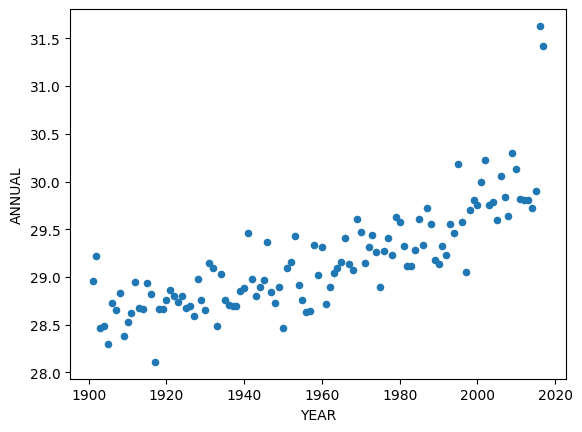

In [ ]:
temp.plot(x = "YEAR" , y = "ANNUAL" , kind = "scatter")

In [ ]:
x = temp["YEAR"].values.reshape(-1,1)
y = temp["ANNUAL"].values.reshape(-1,1)

In [ ]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[5.82743155]
[[0.01191538]]


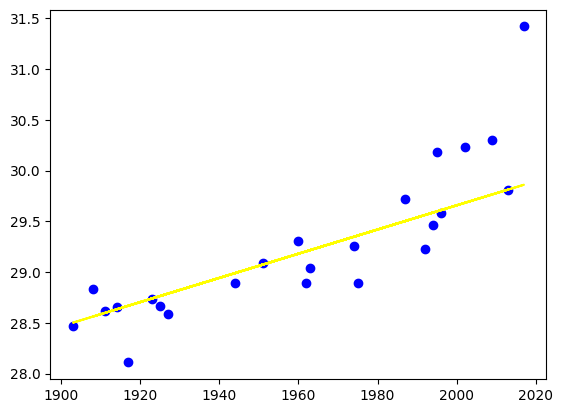

In [ ]:
plt.scatter(x_test , y_test , color = "blue")
plt.plot(x_test , y_pred , color = "yellow")
plt.show()

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))


Mean Absolute Error:  0.2679819699226716
Mean Squared Error:  0.1813342503617877
R2 Score:  0.6559202863350508


<Axes: xlabel='YEAR', ylabel='NOV'>

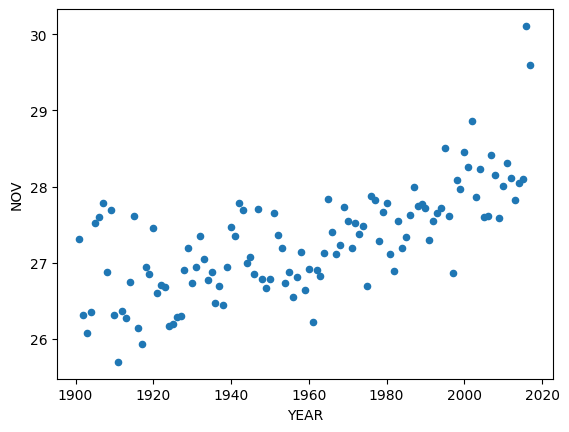

In [ ]:
temp.plot(x = "YEAR" , y = "NOV" , kind = "scatter")

In [ ]:
x = temp["YEAR"].values.reshape(-1,1)
y = temp["NOV"].values.reshape(-1,1)

In [ ]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[2.27964647]
[[0.01277638]]


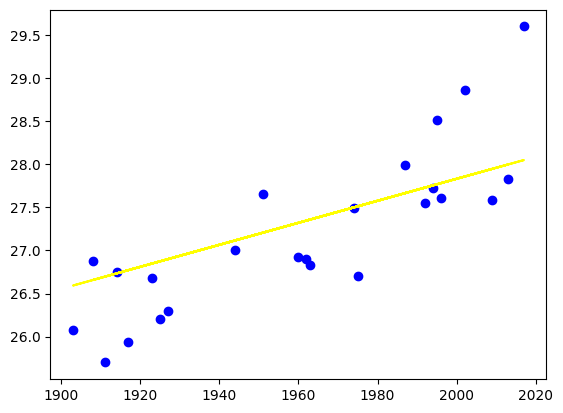

In [ ]:
plt.scatter(x_test , y_test , color = "blue")
plt.plot(x_test , y_pred , color = "yellow")
plt.show()

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  0.47186544442190687
Mean Squared Error:  0.36009177632701145
R2 Score:  0.5747804624265603
